In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb

I will now load the dataset ma devo capire che sto a fa


In [9]:
names=["class label", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi",
                     "lepton 2 pT", "lepton 2 eta", "lepton 2 phi",
                     "missing energy magnitude", "missing energy phi", 
                     "MET_rel", "axial MET","M_R", "M_TR_2", "R", "MT2", "S_R",
                     "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
df = pd.read_csv('SUSY.csv', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',',
                 names=names)
df.head(10)

,class label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


I want to study three different models of classification: with just low-level features (first 8), with just high-level (last 10) and with both of them. Hence i'll define different arrays.

In [10]:
#All features
x=df.iloc[:,1:]
x = x.values

#low-level features
x_low=df.iloc[:,1:9]
x_low = x_low.values

#high-level features
x_high=df.iloc[:,10:]
x_high = x_high.values

#target
y = df["class label"].values


Below low-level variable are plotted. Those shows some distinguishing characteristic of the events.

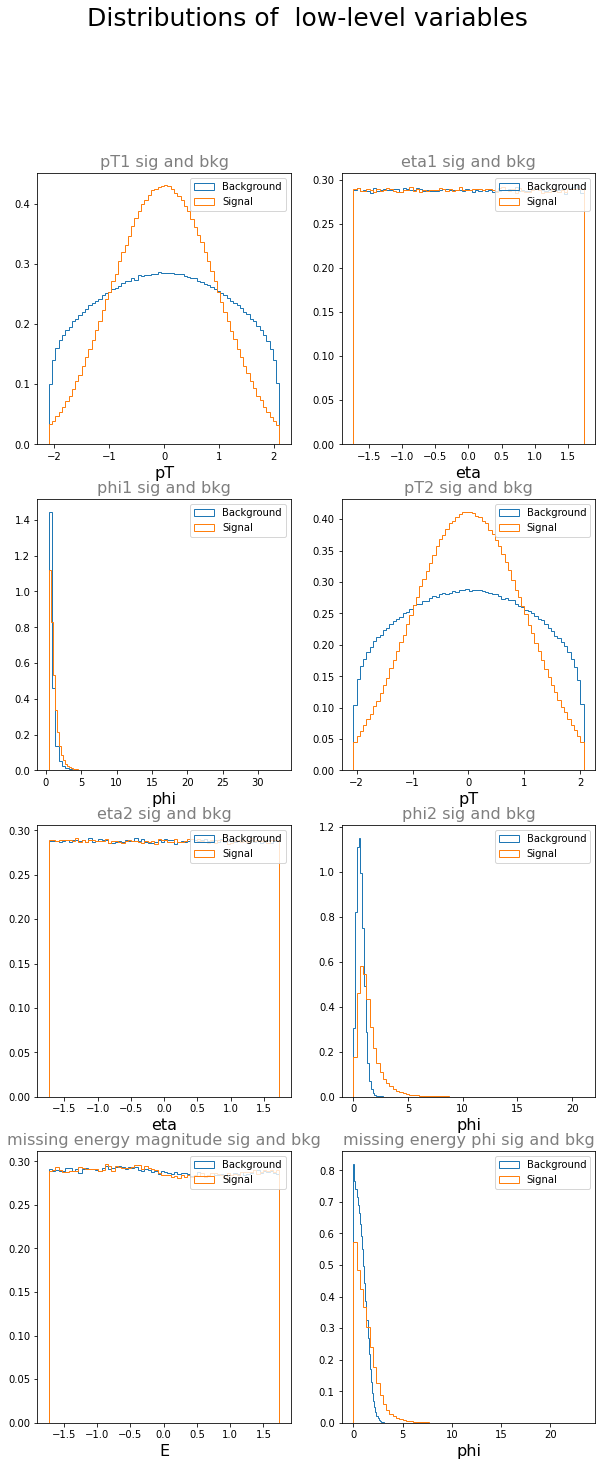

In [11]:
fig, axL = plt.subplots(4,2, figsize=(10,23))
axL[0,0].hist(x[:,1][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,0].hist(x[:,1][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,0].set_title("pT1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,0].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)


axL[0,1].hist(x[:,2][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,1].hist(x[:,2][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,1].set_title("eta1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,1].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)

axL[1,0].hist(x[:,3][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,0].hist(x[:,3][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,0].set_title("phi1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,0].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[1,1].hist(x[:,4][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,1].hist(x[:,4][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,1].set_title("pT2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,1].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)

axL[2,0].hist(x[:,5][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,0].hist(x[:,5][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,0].set_title("eta2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,0].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)


axL[2,1].hist(x[:,6][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,1].hist(x[:,6][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,1].set_title("phi2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[3,0].hist(x[:,7][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,0].hist(x[:,7][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,0].set_title("missing energy magnitude sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,0].set_xlabel('E',  fontsize = 16, color = 'black', alpha = 1)

axL[3,1].hist(x[:,8][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,1].hist(x[:,8][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,1].set_title("missing energy phi sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

plt.suptitle('Distributions of  low-level variables', fontsize=25)
axL[0,0].legend()
axL[0,1].legend()
axL[1,0].legend()
axL[1,1].legend()
axL[2,0].legend()
axL[2,1].legend()
axL[3,0].legend()
axL[3,1].legend()



plt.show()


In [12]:
class_counts= df.groupby('class label').size()
print(class_counts)



#all
x_train, x_test, y_train, y_test = train_test_split(x,y,
                            test_size=0.4,
                             random_state=42,stratify=y)



#low-level
xL_train, xL_test, y_train, y_test = train_test_split(x_low,y,
                            test_size=0.4,
                             random_state=42,stratify=y)





#high-level
xH_train, xH_test, y_train, y_test = train_test_split(x_high,y,
                            test_size=0.4,
                             random_state=42,stratify=y)

class label
0.0    2712173
1.0    2287827
dtype: int64


I will now scale the datasets

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

xL_train = scaler.fit_transform(xL_train)
xL_test = scaler.transform(xL_test)

xH_train = scaler.fit_transform(xH_train)
xH_test = scaler.transform(xH_test)

# I use xgboost to build up my model, hence i build two matrices for train and test.
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test,y_test)

I need to find the best parameters in order to have the best model which minimize the error. To do that i perform cross validation trying different values of parameters in selected ranges. I start searching for max_depth, min_child_weight which helps in fixing the complexity and controlling overfit of the model. I'll consider the dataset sith all the variables.

In [ ]:
param = { }
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "error"
num_round = 70

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,11) # i saw that 15 makes it to overfit, after some rounds the error starts to increase
    for min_child_weight in range(6,8)
]
# Define initial best params and error
min_err = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
# Update our parameters
    param['max_depth'] = max_depth
    param['min_child_weight'] = min_child_weight
# Run CV
    cv_results = xgb.cv(
        param,
        dtrain,
        num_boost_round=num_round,
        seed=42,
        nfold=3, # 5 was too long, choose this beacause the sample is large and it takes too much time
        metrics={'error'},
        early_stopping_rounds=6
    )
# Update best error
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError: {} for {} rounds".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_err)) 

Hence i save these best parmeters and with anogher cross validation i find the best learning rate for those two parameters:

In [ ]:
min_err = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    param={}
    param['max_depth'] = 9
    param['min_child_weight'] = 6
    param['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            param,
            dtrain,
            num_boost_round=70,
            seed=42,
            nfold=3,
            metrics=['error'],
            early_stopping_rounds=6
          )
    # Update best score
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_err))

I have now the best model for the BDT considering all the variables, hence i can train and test it. I will change the evaluation metric as the AUC is the most common for classification problems. Early stopping helps in avoiding overfitting.

In [14]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]
param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "auc" #auc,rmse,roc. This evaluate how good the model is. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
num_round = 70 #low eta means larger num_round
bst = xgb.train(param, dtrain, num_round, evallist,early_stopping_rounds=6)

print("Best AUC: {:.3f} with {} rounds".format(
                 bst.best_score,
                 bst.best_iteration+1))

[0]	eval-auc:0.85760	train-auc:0.85895
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 6 rounds.
[1]	eval-auc:0.86163	train-auc:0.86290
[2]	eval-auc:0.86331	train-auc:0.86470
[3]	eval-auc:0.86460	train-auc:0.86603
[4]	eval-auc:0.86520	train-auc:0.86669
[5]	eval-auc:0.86604	train-auc:0.86755
[6]	eval-auc:0.86666	train-auc:0.86820
[7]	eval-auc:0.86709	train-auc:0.86868
[8]	eval-auc:0.86760	train-auc:0.86919
[9]	eval-auc:0.86810	train-auc:0.86973
[10]	eval-auc:0.86848	train-auc:0.87013
[11]	eval-auc:0.86892	train-auc:0.87060
[12]	eval-auc:0.86934	train-auc:0.87104
[13]	eval-auc:0.86972	train-auc:0.87145
[14]	eval-auc:0.87002	train-auc:0.87179
[15]	eval-auc:0.87029	train-auc:0.87208
[16]	eval-auc:0.87059	train-auc:0.87240
[17]	eval-auc:0.87106	train-auc:0.87292
[18]	eval-auc:0.87131	train-auc:0.87318
[19]	eval-auc:0.87170	train-auc:0.87361
[20]	eval-auc:0.87201	train-auc:0.87395
[21]	eval-auc:0.87221	train-

In [21]:
y_pred = bst.predict(dtest)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.31%


In [27]:
print(roc_auc_score(y_test,y_pred))

0.8765225719975075
